### Exploratory LinkedIn Data Analysis

#### 0) Imports

#### 1) Explore Data
    1.1 Wrangle in the data from labels and predictors, summarize and visualize
    1.2 remove missing data & prepare it for ML
    
#### 2) Preliminary ML Stuff

#### 3) Preliminary NLP Stuff

### 0) Imports

In [1]:
# Data Read/Write/Manipulation
import pandas as pd
import numpy as np

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# NLP
from sklearn.feature_extraction.text import CountVectorizer

### 1) Explore/Clean Data

#### Wrangle in the data from labels and predictors, summarize and visualize

In [2]:
df = pd.read_csv('temp_datalab_records_linkedin_company.csv')
df.head()

/home/greg/anaconda3/envs/TF2/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [3]:
# Check how much data we have, exactly
df.shape

(2426196, 14)

Right away, it's clear that we should modify the data set so that there is only one entry per company name, if I was going to actually use this particular set.  The easiest way to do this would be to take only the most recent "as_of_date" for a given "company_name." ... something like ...

In [4]:
df1 = df.drop_duplicates('company_name')
df1.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
5,58382,2015-09-16,UnitedHealth Group,221288,77108,https://www.linkedin.com/company/1720,Hospital & Health Care,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check how much data we have now, exactly
df1.shape

(5028, 14)

In [6]:
# What are the date types in each column?
df1.dtypes

dataset_id                 int64
as_of_date                object
company_name              object
followers_count            int64
employees_on_platform      int64
link                      object
industry                  object
date_added                object
date_updated              object
description               object
website                   object
entity_id                float64
cusip                    float64
isin                     float64
dtype: object

Text(141.0, 0.5, 'Total # Transactions')

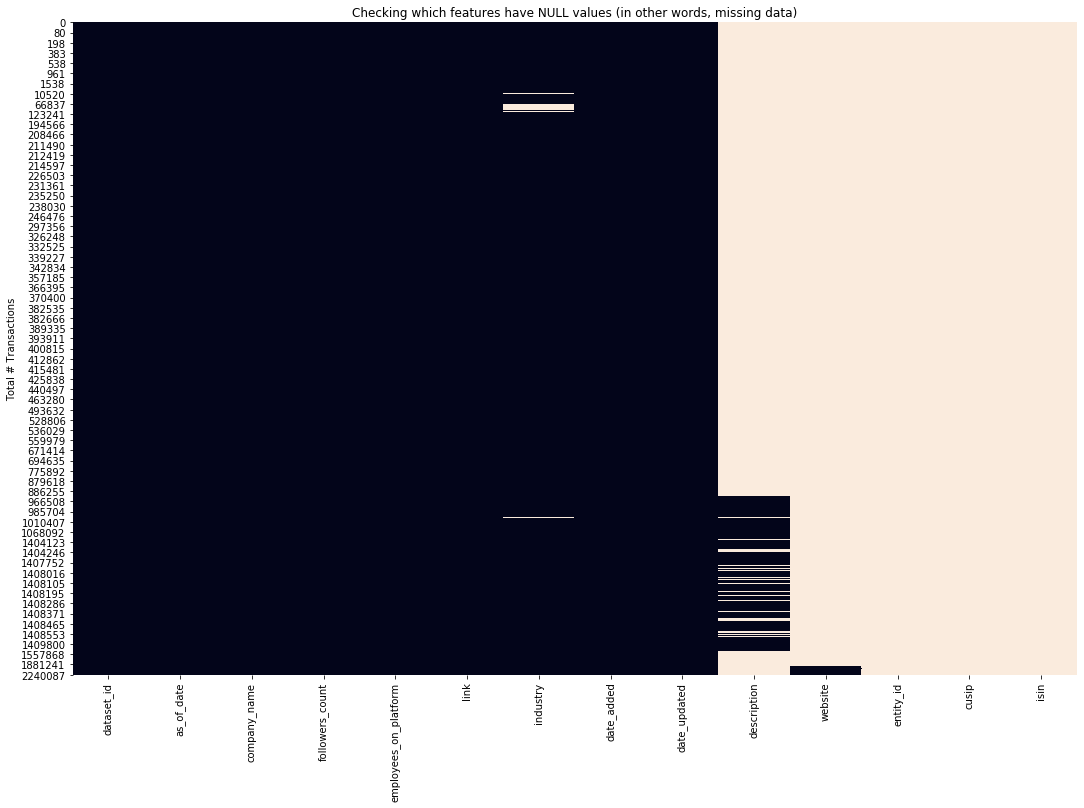

In [7]:
# look for missing data, visually
plt.figure(figsize = (18,12))
sns.heatmap(df1.isnull(), cbar=False)
plt.title('Checking which features have NULL values (in other words, missing data)')
plt.ylabel('Total # Transactions')

Some notes here:

- probably should drop columns from description to the end of the data set
- can consider filling in the "industry" columns with the resulting data set that's nearly full, or filling in missing values some other way; else we can just drop those
- it's nice to see that all LinkedIn companies have links...but writing that makes me realize how stupid it is haha (Linked...link...is that...linked?)

Intuitively, we could probably make some cool machine learning models after filtering this data to predict, I don't know, a metric like ration of employees_on_platform to followers_count.  This might be relevant.

We might first want to check if we're dealing with a variable with some weird distribution

In [8]:
df1 = df1.reset_index(drop=True)
df1.head()

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58382,2015-09-16,UnitedHealth Group,221288,77108,https://www.linkedin.com/company/1720,Hospital & Health Care,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


The Average is:  0.17
The standard Deviation is:  0.27


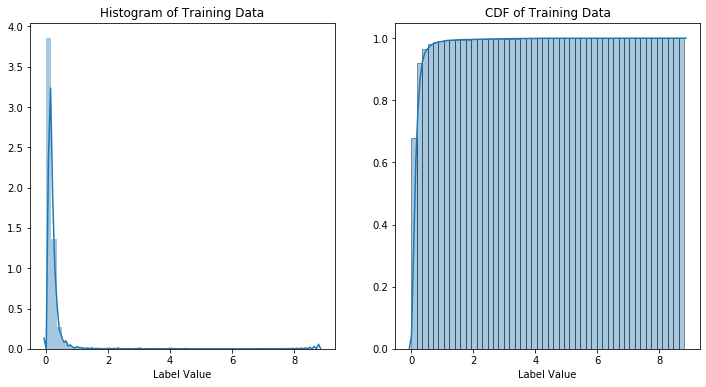

In [9]:
# Look at distribution of employees_on_platform/followers_count - is it normally distributed?
metric_for_ml = df1.employees_on_platform.div(df1.followers_count)

# Drop NaNs and any companies that have zero followers
metric_for_ml = metric_for_ml.replace([np.inf, -np.inf], np.nan)
metric_for_ml = metric_for_ml.dropna()

print('The Average is: ', np.round(np.mean(metric_for_ml), 2) ) 
print('The standard Deviation is: ', np.round(np.std(metric_for_ml), 2) )

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Histogram of Training Data')
plt.xlabel('Label Value')
sns.distplot(metric_for_ml)

plt.subplot(1, 2, 2)
plt.title('CDF of Training Data')
plt.xlabel('Label Value')
sns.distplot(metric_for_ml, hist_kws={'cumulative': True, 'edgecolor': 'k'}, kde_kws={'cumulative': True})

Looks like we have outputs that are totally not normally distributed.  Very interesting to see the Pareto principle at work here.

Text(33.0, 0.5, 'Total # Transactions')

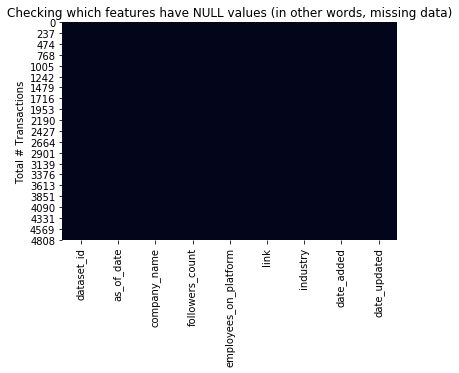

In [10]:
# If we wanted to keep going with ML stuff we might drop columns that we will not be using for ML
df1 = df1.drop(columns=['description', 'website', 'entity_id', 'cusip', 'isin'])

# Remove the data points that we have only outputs and no associated inputs
df1 = df1.dropna(axis=0)

# Did we get it all?
sns.heatmap(df1.isnull(), cbar=False)
plt.title('Checking which features have NULL values (in other words, missing data)')
plt.ylabel('Total # Transactions')

The data is officially cleansed and ready to roll into a supervised learning problem (assuming that would even be of interest).

### 2) Preliminary ML Stuff
What if I wanted to build a predictive (supervised) model?

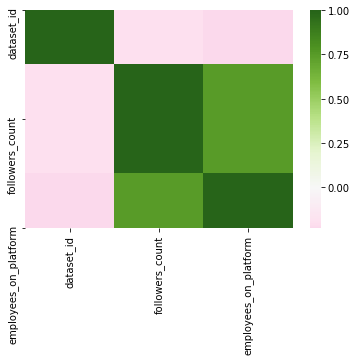

In [11]:
# Now we can look at our correlation data now to see which inputs are likely to affect our output
sns.heatmap(df1.corr(), cmap="PiYG", center=0)

Note that the object data types are not shown because we have not transformed them from categorical data.  I will leave this for future work.  From here you might decide which data you want to predict, split into X and Y, standardize your inputs and outputs, and roll on withe some ML!


For a regression problem, I'll generally start by looking at linear regression (if the problem warrants it), then I'll see how XGBoost and Random Forest approaches do.  Each time I'll plot the actual versus predicted, and it's nice when you have access to feature importances too.  I've also got some standard that I've used for grid/random searching and cross-validating the design space represented by the data and the model hyperparameters. 

### 3) Preliminary NLP Stuff
What if I wanted to build a natural language model?

For now, maybe I'll just show how I'd like to get started with some natural language analysis.  

Generally speaking, the simplest solution is the best in my experience when it comes to NLP. 

First, in my project I'm going to create some word embeddings (not from this data, but let's say from the Coursera stuff)

Generally, embeddings can be created in ways that either leverage context (i.e., the position of words in a sentence), or in ways that do not.  Autoencoders, such as those built into tools like TensorFlow, leverage context implicitly, and simpler Bag-Of-Words (BOW) approaches use a more direct word-counting approach.

No context (i.e., no relationship between words)
    • CountVectorizer
        ◦ BOW
    • Term Frequency (TF) Vectorizer
        ◦ Normalized BOW
    • Term Frequency Inverse Document Frequency (TF-IDF) Vectorizer
        ◦ Normalized BOW where rare words contribute more weight
        
To Leverage Context
    • Word2Vec
        ◦ Skip-gram
        ◦ Continuous BOW
    • FastText
    • Latent Semantic Analysis/Latent Semantic Indexing
        ◦ This is basically TF-IDF + Singular Value Decomposition
    • Neural Network (at least 2 layers)
 
I'd love to talk to instructors and cohort members about which of these to leverage for what I want to do.

For this data, let's say that I'm interested in determining what the most popular industries are...how might I go about this?

In [12]:
all_entries = df1.iloc[:,6]
all_entries

0                        Investment Banking
1                      Aviation & Aerospace
2                           Pharmaceuticals
3                                    Retail
4                    Hospital & Health Care
5                    Hospital & Health Care
6                                   Banking
7       Information Technology and Services
8       Information Technology and Services
9                           Pharmaceuticals
10                          Pharmaceuticals
11                      Computer Networking
12      Electrical/Electronic Manufacturing
13                                  Banking
14                                 Internet
15                                  Tobacco
16                           Semiconductors
17                             Oil & Energy
18                                   Retail
19                               Automotive
20                            Entertainment
21                           Consumer Goods
22                          Mini

In [13]:
vocab_list_entries = all_entries.drop_duplicates()

# Look at list of tags
vocab = list(vocab_list_entries)

# Initialize Vectorizer - note the custom vocabulary above
vectorizer = CountVectorizer(min_df=0, vocabulary=vocab, token_pattern=r"(?u)\b\w[\w-]*\w\b") 

# Fit Vectorizer to TRAINING corpus
all_entries2 = [str(item) for item in all_entries]
model = vectorizer.fit(all_entries2)

# Transform corpus to bags of words (tuple structure)
bag_of_words = vectorizer.transform(all_entries2)
print(bag_of_words)

# Convert tuples to vectors
X = bag_of_words.toarray()

# Visualize Training Data
sum_words = X.sum(axis=0)
print(sum_words)

#freq_words = pd.DataFrame(sum_words, index=vocab)
#freq_words.plot(kind='bar', figsize=(16, 3), fontsize=10, legend=None)

meta_data = pd.concat([pd.DataFrame(list(vocab)), pd.DataFrame(sum_words)], axis=1)
meta_data.columns = ['word', 'count']
meta_data.sort_values(by='count', ascending=False).head()


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


,word,count
0,Investment Banking,0
93,Broadcast Media,0
87,Civil Engineering,0
88,Plastics,0
89,Individual & Family Services,0


This isn't quite working right now, but I think that you get the idea and I'm out of time for this Challenge 1 for now.  

Of course, I could've done the previous analysis with pandas and multi-level indexing directly, as in Challenge 2, but this is just for demonstration purposes.  You know...like this.

In [14]:
all_entries.value_counts()

Biotechnology                           332
Banking                                 332
Financial Services                      290
Oil & Energy                            204
Information Technology and Services     196
Computer Software                       186
Pharmaceuticals                         186
Retail                                  170
Real Estate                             166
Internet                                156
Telecommunications                      136
Medical Devices                         125
Insurance                               123
Electrical/Electronic Manufacturing     113
Semiconductors                          105
Automotive                               92
Utilities                                84
Consumer Goods                           80
Marketing and Advertising                80
Mining & Metals                          74
Chemicals                                68
Machinery                                67
Restaurants                     

Thanks!  

-Greg Loughnane, 5/5/20